# DS 3000 - Assignment 03

**Student Name**: Janav Sama

**Date**: 05/28/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Question 1: 

(3 pts) Load the data into a dataframe. Inspect the data and perform at least one type of data preparation.


In [2]:
# Loading the data into a dataframe
airport_data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [3]:
# Inspecting the data
airport_data.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [4]:
# Counting the nan values in the columns
airport_data.isnull().sum()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64

In [5]:
# Dropping nan values
airport_data = airport_data.dropna()

In [6]:
# Verifying change
airport_data.isnull().sum()

Activity Period                0
Activity Period Start Date     0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
data_as_of                     0
data_loaded_at                 0
dtype: int64

In [7]:
# Checking the variables
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 35171
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              34856 non-null  int64 
 1   Activity Period Start Date   34856 non-null  object
 2   Operating Airline            34856 non-null  object
 3   Operating Airline IATA Code  34856 non-null  object
 4   Published Airline            34856 non-null  object
 5   Published Airline IATA Code  34856 non-null  object
 6   GEO Summary                  34856 non-null  object
 7   GEO Region                   34856 non-null  object
 8   Activity Type Code           34856 non-null  object
 9   Price Category Code          34856 non-null  object
 10  Terminal                     34856 non-null  object
 11  Boarding Area                34856 non-null  object
 12  Passenger Count              34856 non-null  int64 
 13  data_as_of                   34856 n

In [8]:
# Setting the right variables
airport_data['Activity Period'] = airport_data['Activity Period'].astype('int')
airport_data['Activity Period Start Date'] = airport_data['Activity Period Start Date'].astype('datetime64[us]')

airport_data['Operating Airline'] = airport_data['Operating Airline'].astype('string')
airport_data['Operating Airline IATA Code'] = airport_data['Activity Period Start Date'].astype('string')

airport_data['Published Airline'] = airport_data['Published Airline'].astype('string')
airport_data['Published Airline IATA Code'] = airport_data['Published Airline IATA Code'].astype('string')

airport_data['GEO Summary'] = airport_data['GEO Summary'].astype('category')
airport_data['GEO Region'] = airport_data['GEO Region'].astype('category')

airport_data['Activity Type Code'] = airport_data['Activity Type Code'].astype('category')
airport_data['Price Category Code'] = airport_data['Price Category Code'].astype('category')

airport_data['Terminal'] = airport_data['Terminal'].astype('category')
airport_data['Boarding Area'] = airport_data['Boarding Area'].astype('category')

airport_data['Passenger Count'] = airport_data['Passenger Count'].astype('int')
airport_data['data_as_of'] = airport_data['data_as_of'].astype('datetime64[us]')

airport_data['data_loaded_at'] = airport_data['data_loaded_at'].astype('datetime64[us]')

In [9]:
# Rechecking the data type
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 35171
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              34856 non-null  int64         
 1   Activity Period Start Date   34856 non-null  datetime64[us]
 2   Operating Airline            34856 non-null  string        
 3   Operating Airline IATA Code  34856 non-null  string        
 4   Published Airline            34856 non-null  string        
 5   Published Airline IATA Code  34856 non-null  string        
 6   GEO Summary                  34856 non-null  category      
 7   GEO Region                   34856 non-null  category      
 8   Activity Type Code           34856 non-null  category      
 9   Price Category Code          34856 non-null  category      
 10  Terminal                     34856 non-null  category      
 11  Boarding Area                34856 non-null  c

## Question 2:

(5 pts) Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.

The terminal with the most traffic is the Terminal 3 at over 800,000 passengers at SFO during the years. This could be due to the fact that its a domestic terminal with a large number of incoming and outgoing routes.

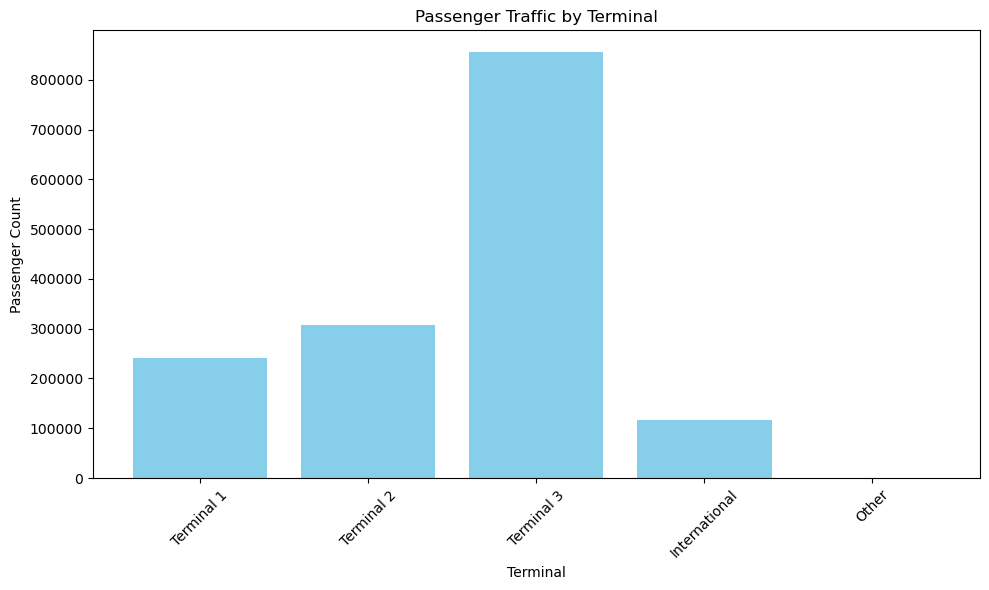

In [10]:
# Aggregating the terminals and its passenger count
air_traffic = airport_data.groupby('Terminal', observed=False)['Passenger Count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(airport_data['Terminal'], airport_data['Passenger Count'], color='skyblue')
plt.title('Passenger Traffic by Terminal')
plt.xlabel('Terminal')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 3:

(10 pts) Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.
Tip: It is recommended that you create two charts; chart #1 for the international travelers and Chart #2 for the domestic travelers. Then in each chart, visualize the number of passengers who enplaned and deplaned each year. The annual passenger enplanement and deplanement should be visualized using separate lines.


Annual international and domestic passenger traffic highlighting enplaned and deplaned passengers from 1999 to 2023 suggests a   peak in 2019 and plunged in 2020 due to the COVID-19 pandemic. However, this is recovered in 2021, but levels haven't yet returned to pre-pandemic highs in 2023.

In [18]:
# Aggregating data for domestic and international by year
domestic = airport_data[airport_data['GEO Summary'] == 'Domestic'].groupby(['Year', 'Activity Type Code'], observed=False)['Passenger Count'].sum().unstack()
international = airport_data[airport_data['GEO Summary'] == 'International'].groupby(['Year', 'Activity Type Code'], observed=False)['Passenger Count'].sum().unstack()

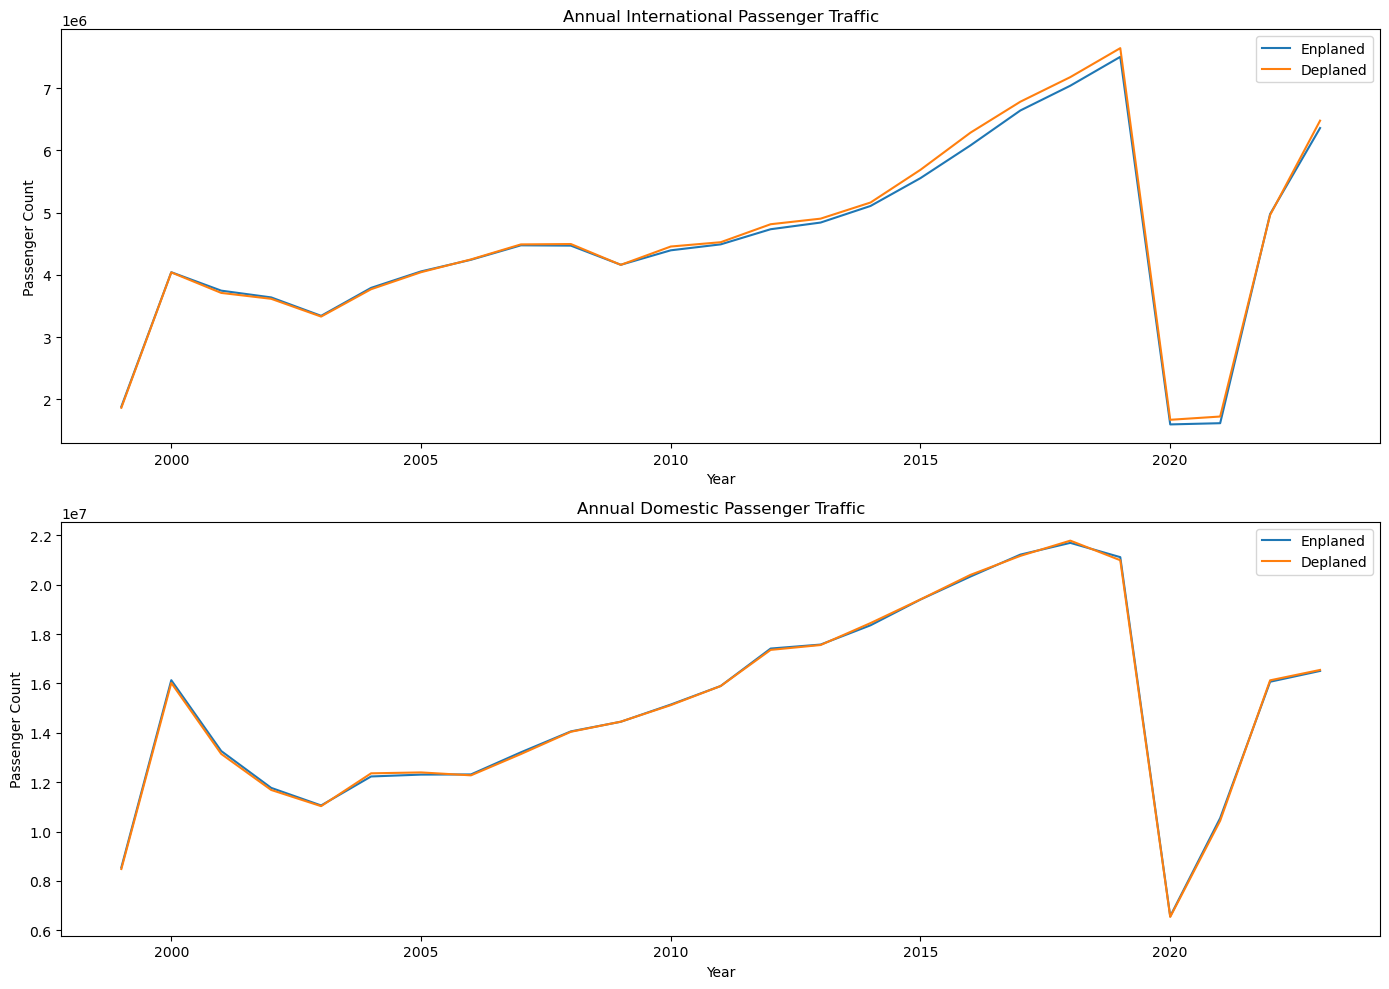

In [19]:
# Plotting the line chart
plt.figure(figsize=(14, 10))

# Plotting for International Travelers
plt.subplot(2, 1, 1)
plt.plot(international.index, international['Enplaned'], label='Enplaned')
plt.plot(international.index, international['Deplaned'], label='Deplaned')
plt.title('Annual International Passenger Traffic')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()

# Plotting for Domestic Travelers
plt.subplot(2, 1, 2)
plt.plot(domestic.index, domestic['Enplaned'], label='Enplaned')
plt.plot(domestic.index, domestic['Deplaned'], label='Deplaned')
plt.title('Annual Domestic Passenger Traffic')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()

plt.tight_layout()
plt.show()

## Question 4

(10 pts) Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.

Overall, during the last 10 years, United Airlines remains the top airline in SFO. This could be due to the airline's extensive connectivity, exceptional service or onboard experience. Additionally, over the years, American Airlines, Delta Air Lines and Skywest Airline also grew its traffic steadily, although never reaching United's passenger traffic count. 

Passenger traffic count per airline for the last 10 years is also printed after the graph.  

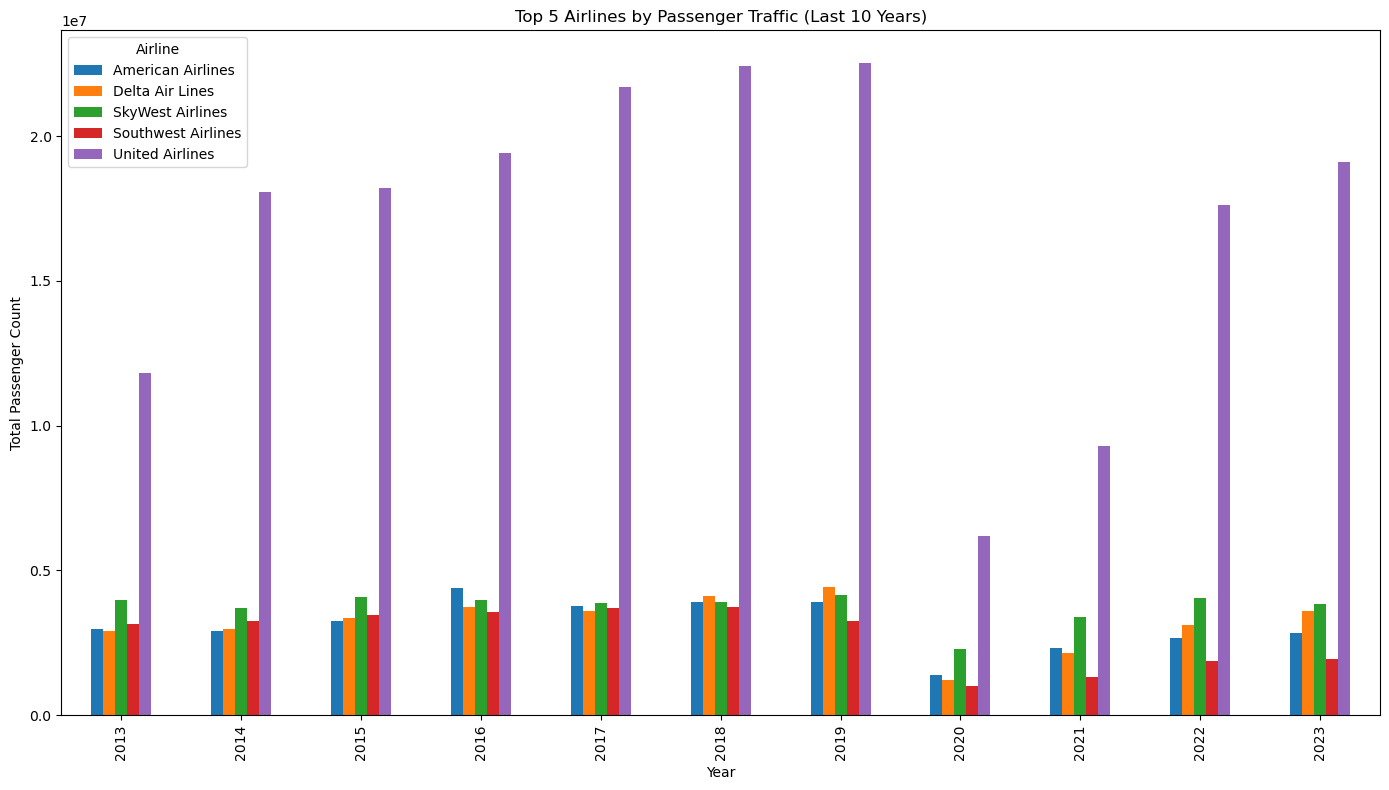

Operating Airline,American Airlines,Delta Air Lines,SkyWest Airlines,Southwest Airlines,United Airlines
Year,,,,,
2013,2983840,2905729,3963526,3144575,11820404
2014,2924657,2983327,3699652,3268483,18055781
2015,3238472,3362217,4090207,3469646,18203168
2016,4396696,3749816,3992470,3547984,19430014
2017,3763394,3602617,3887792,3704789,21707841
2018,3899614,4114808,3927778,3730470,22428953
2019,3918421,4431211,4166660,3250038,22528891
2020,1384010,1231738,2291225,994740,6180223
2021,2326420,2136651,3386516,1305021,9312694


In [14]:
# Extracting the year from 'Activity Period'
airport_data['Year'] = airport_data['Activity Period'].astype(str).str[:4].astype(int)

# Filtering
last_10_years_data = airport_data[airport_data['Year'] >= (airport_data['Year'].max() - 10)]

# Grouping data by year, airline, and sum passenger counts
grouped_data = last_10_years_data.groupby(['Year', 'Operating Airline'])['Passenger Count'].sum().reset_index()

# Top 5 airlines
top_airlines = grouped_data.groupby('Operating Airline')['Passenger Count'].sum().nlargest(5).index
filtered_data = grouped_data[grouped_data['Operating Airline'].isin(top_airlines)]

# Pivoting the data for easier plotting
pivot_data = filtered_data.pivot(index='Year', columns='Operating Airline', values='Passenger Count')

# Plotting the bar chart
pivot_data.plot(kind='bar', figsize=(14, 8))
plt.title('Top 5 Airlines by Passenger Traffic (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.legend(title='Airline')
plt.tight_layout()
plt.show()

# Displaying the value counts
pivot_data

## Question 5

(7 pts) Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.


Travel during the month of May is typically high. This is understandable as May is a travel month for summer break. During 2003 to 2018, the number of people who deplaned increased over the years.   

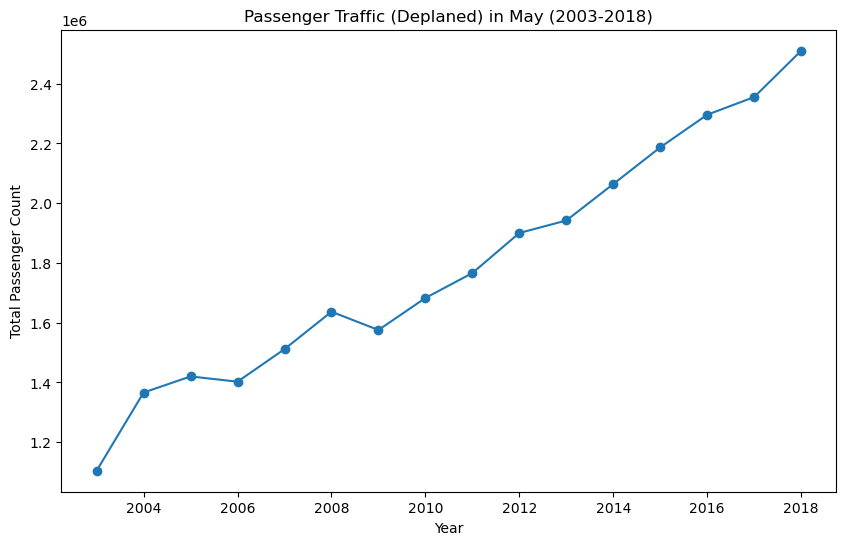

In [15]:
# Extracting the data
airport_data['Year'] = airport_data['Activity Period'].astype(str).str[:4].astype(int)
airport_data['Month'] = airport_data['Activity Period'].astype(str).str[4:]

# Filtering data for May from 2003 to 2018 and 'Deplaned' activity type
filtered_data = airport_data[(airport_data['Year'] >= 2003) & (airport_data['Year'] <= 2018) & (airport_data['Month'] == '05') & (airport_data['Activity Type Code'] == 'Deplaned')]

# Grouping data
grouped_data = filtered_data.groupby('Year')['Passenger Count'].sum()

# Plotting a line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.title('Passenger Traffic (Deplaned) in May (2003-2018)')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.show()

## Question 6

(10 pts) Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.

Using linear regression helps predict values based on historical data. The number of passengers who deplaned in May was predicted to rise as it typically did, historically. In 2018, the number was at a all time high. Its only logical to predict a number higher than that. However, the occurance of COVID-19 pandemic was unpredictable. The global pandemic led to a decline in the number of passengers and hence throwing the prediction way off.  

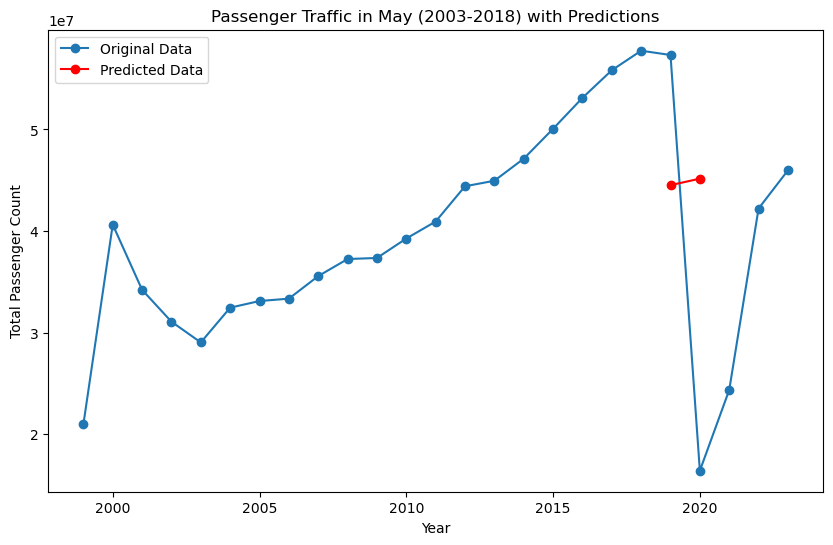

Predicted passenger count for May 2019: 44508365
Predicted passenger count for May 2020: 45149631


In [16]:
# Extracting data
airport_data['Year'] = airport_data['Activity Period'].astype(str).str[:4].astype(int)

# Grouping data
grouped_data = airport_data.groupby('Year')['Passenger Count'].sum()

# Linear regression
X = grouped_data.index.values.reshape(-1, 1)
y = grouped_data.values

model = LinearRegression()
model.fit(X, y)

# Making predictions
predicted_2019 = model.predict([[2019]])[0]
predicted_2020 = model.predict([[2020]])[0]

# Visualizing the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label='Original Data')
plt.plot([2019, 2020], [predicted_2019, predicted_2020], marker='o', linestyle='-', color='red', label='Predicted Data')
plt.title('Passenger Traffic in May (2003-2018) with Predictions')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.legend()
plt.show()

# Displaying passenger counts
print("Predicted passenger count for May 2019:", round(predicted_2019))
print("Predicted passenger count for May 2020:", round(predicted_2020))

## Question 7

(5 pts) Calculate the R-squared and explain what this tells you about the model.

R-squared is a statistical measure that indicates the proportion of the variance in the dependent variable that is explained by the independent variable in a linear regression model. An R-squared value of 0.98 means that 98% of the variance in the dependent variable (passenger count) is explained by the independent variable (year) in the linear regression model. This indicates a very strong fit of the model to the data, suggesting that the year is an good predictor of passenger traffic. However, the 2% could be a room for a error or just an outlier. 

In [17]:
# Grouping data
grouped_data = filtered_data.groupby('Year')['Passenger Count'].sum()
X = grouped_data.index.values.reshape(-1, 1)
y = grouped_data.values

# Linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculating and rounding the R-squared value
r_squared = model.score(X, y)
r_squared = round(r_squared, 2)
print("R-squared:", r_squared)

R-squared: 0.98


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
